# **Forecasting with machine learning**

## Objectives

* use and ml model to forecast apple stock market data

## Accessing and visualising data

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [12]:
# Some functions to help out with plotting
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Apple Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Apple Stock Price')
    plt.title('Apple Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Apple Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [4]:
from pathlib import Path
import pandas as pd

path = Path('../stockdata/AAPL_2006-01-01_to_2018-01-01.csv')

apple_stock = pd.read_csv(
    path,
    usecols=['Date','High'],
    parse_dates =['Date'],
    index_col='Date',
) 

y = apple_stock.loc[:, 'High'].dropna().to_period('Date')

df = pd.DataFrame

In [14]:
training_set = apple_stock[:'2016'].iloc[:,1:2].values
test_set = apple_stock['2017':].iloc[:,1:2].values

In [16]:
print(training_set)

[[ 10.68]
 [ 10.85]
 [ 10.7 ]
 ...
 [118.02]
 [117.11]
 [117.2 ]]


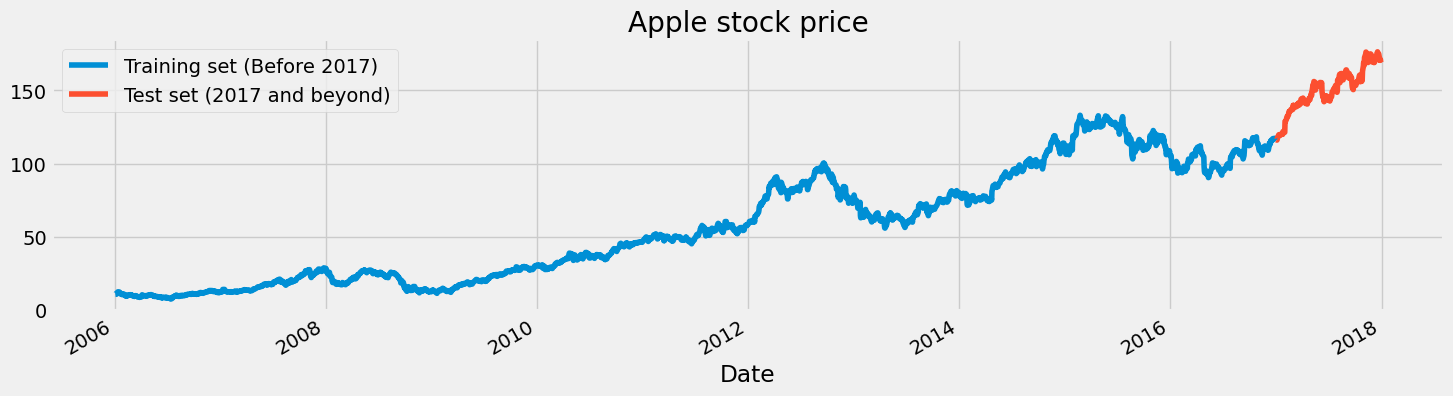

In [17]:
# Plot of Close attribute for stock prices for train and test sets
apple_stock["Close"][:'2016'].plot(figsize=(16,4),legend=True)
apple_stock["Close"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('Apple stock price')
plt.show()

In [20]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60,2768):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)